Training MSE: 0.0002004338241757498
Validation MSE: 0.030269016369823112
Feature matrix shape: (44, 40)
Label vector shape: (44,)
First window features: [0.08820262 0.06007729 0.1290114  0.23199562 0.25301264 0.15019823
 0.2856742  0.26932701 0.31001428 0.37347926 0.39735872 0.49945075
 0.50068407 0.50386796 0.55432985 0.58231817 0.67292764 0.61959414
 0.67612214 0.64731982 0.59082264 0.77844658 0.81508312 0.75960896
 0.93378115 0.76983378 0.86574533 0.87361666 0.97771502 0.99119689
 0.94065516 0.96549631 0.91435888 0.87032838 0.96103563 0.99374016
 1.05334513 1.05626438 0.97949383 0.98485545]
First window label: 0.6829089072114181


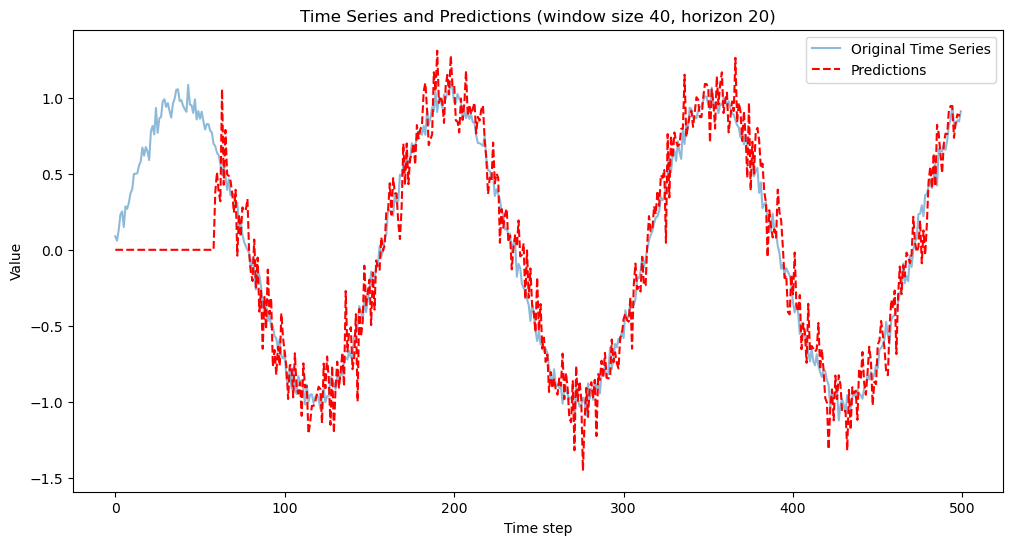

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

n_points = 500

# 1. Generate a time series
np.random.seed(0)  # Seed for reproducibility
time_series = np.sin(np.linspace(0, 20, n_points)) + 0.1*np.random.normal(scale=0.5, size=n_points)


# Step 2: Define Function for Windowing
def extract_windows_and_labels(data, window_size, horizon):
    """
    Extracts overlapping windows and their corresponding future labels from a time series.
    
    Parameters:
        data (np.array): The time series data.
        window_size (int): The number of time steps in each window.
        horizon (int): The number of steps ahead for the label.
    
    Returns:
        features (np.array): A matrix of shape (num_samples, window_size) containing the input features.
        labels (np.array): A vector of shape (num_samples,) containing the labels.
    """
    num_samples = len(data) - window_size - horizon + 1
    features = np.zeros((num_samples, window_size))
    labels = np.zeros(num_samples)
    
    for i in range(num_samples):
        features[i] = data[i:i+window_size]
        labels[i] = data[i+window_size+horizon-1]  # Future value at specified horizon
    
    return features, labels

# Step 3: Extract Features and Labels
window_size = 40  # Number of time steps in each window
horizon = 20      # Future horizon to predict
features, labels = extract_windows_and_labels(time_series, window_size, horizon)

X_train, X_val, y_train, y_val = train_test_split( features, labels, test_size=0.9, random_state=42)

# Step 4: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict on training data
y_train_pred = model.predict(X_train)

# Step 6: Predict on validation data
y_val_pred = model.predict(X_val)

# Step 7: Compute Training MSE
train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training MSE: {train_mse}')

# Step 8: Compute Validation MSE
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')



# Step 5: Make Predictions
predictions = model.predict(features)
forecast = np.zeros(time_series.shape)

for i in range(len(time_series) - window_size - horizon + 1):
    forecast[i+window_size+horizon-1]=predictions[i]

print("Feature matrix shape:", X_train.shape)
print("Label vector shape:", y_train.shape)
print("First window features:", features[0])
print("First window label:", labels[0])

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', alpha=0.5)
plt.plot(forecast, label='Predictions', color='red', linestyle='--')
plt.title(f'Time Series and Predictions (window size {window_size}, horizon {horizon})')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# List of models to train and validate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Support Vector Regressor", SVR())
]

# Dictionary to store MSE for each model
results = {}

for name, model in models:
    # Step 4: Train the model
    model.fit(X_train, y_train)
    
    # Step 5: Predict on training data
    y_train_pred = model.predict(X_train)
    
    # Step 6: Predict on validation data
    y_val_pred = model.predict(X_val)
    
    # Step 7: Compute Training MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    # Step 8: Compute Validation MSE
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    # Store the results
    results[name] = {
        "Training MSE": train_mse,
        "Validation MSE": val_mse
    }

# Print the results
for name, mse in results.items():
    print(f'{name}:')
    print(f'  Training MSE: {mse["Training MSE"]}')
    print(f'  Validation MSE: {mse["Validation MSE"]}')


Linear Regression:
  Training MSE: 0.002469473698112915
  Validation MSE: 0.0035427511690365376
Decision Tree Regressor:
  Training MSE: 0.0
  Validation MSE: 0.006062084636328766
Random Forest Regressor:
  Training MSE: 0.0004797280802602031
  Validation MSE: 0.0032722702670631002
Support Vector Regressor:
  Training MSE: 0.0025980011446989355
  Validation MSE: 0.0032091419361318482
